## Descargue las bases de datos

In [2]:
!wget -q https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/common_player_info.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_combine_stats.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_history.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/game.csv



1. Tabla games_playoffs_cleaned (Juegos de los Playoffs Filtrados)
Descripción: Esta tabla contiene los datos de los partidos de los Playoffs, filtrados por las temporadas entre 1984 y 2003. Incluye información sobre los equipos, sus resultados, y diversas estadísticas del juego tanto para los equipos locales como los visitantes.

Columnas clave:

game_id: Identificador único del partido.
team_id_home / team_id_away: Identificadores únicos de los equipos que jugaron en casa y fuera.
pts_home / pts_away: Puntos anotados por el equipo local y visitante en cada partido.
wl_home / wl_away: Indicador de victoria o derrota del equipo (W = Ganado, L = Perdido).
season_id: Identificador de la temporada en la que ocurrió el partido.
reb_home / reb_away, ast_home / ast_away, etc.: Estadísticas adicionales como rebotes, asistencias, robos, bloqueos, etc., tanto para los equipos locales como visitantes.
Importancia: Esta tabla es fundamental para analizar el rendimiento de los equipos en los Playoffs a lo largo de las temporadas. Nos permite comparar equipos, analizar victorias y derrotas, y observar tendencias generales en los partidos.

2. Tabla player_game_stats (Estadísticas de Jugadores por Partido)
Descripción: Esta tabla resulta de la combinación (join) entre las estadísticas de los jugadores y los partidos que jugaron en los Playoffs. Contiene información sobre los jugadores individuales y su rendimiento en cada uno de los juegos.

Columnas clave:

person_id: Identificador único de cada jugador.
team_id_home: Identificador del equipo del jugador (coincide con el equipo que jugó en casa en el partido).
pts_home: Puntos anotados por el jugador en el partido.
reb_home, ast_home, stl_home, blk_home, etc.: Otras estadísticas del jugador en el partido, como rebotes, asistencias, robos, bloqueos, etc.
position: La posición del jugador (base, alero, pívot, etc.).
season_exp: Número de años que el jugador ha jugado en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera.
Importancia: Esta tabla es esencial para analizar el rendimiento de los jugadores, identificando quiénes han sido los más destacados en los Playoffs. Nos permite comparar el desempeño de jugadores por puntos, rebotes, asistencias, etc., y estudiar su evolución a lo largo del tiempo.

3. Tabla players_combined_cleaned (Jugadores Combinada y Limpia)
Descripción: Esta tabla contiene la información combinada de los jugadores que han jugado en los equipos durante los Playoffs. Ha sido filtrada y limpia para eliminar columnas irrelevantes, conservando solo la información clave que necesitamos para el análisis.

Columnas clave:

person_id: Identificador único del jugador (clave para combinar con otras tablas).
first_name / last_name: Nombres y apellidos del jugador.
team_id: Identificador del equipo al que perteneció el jugador.
position: Posición del jugador (base, alero, pívot, etc.).
height / weight: Altura y peso del jugador.
season_exp: Número de años de experiencia del jugador en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera

Importe las liberrias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

Caraga las tablas:

```
'common_player_info.csv'
'draft_combine_stats.csv'
'game.csv'
```
 y llamelas: `players_df, combine_stats_df y games_df`


In [4]:
players_df = pd.read_csv('common_player_info.csv')
combine_stats_df = pd.read_csv('draft_combine_stats.csv')
games_df = pd.read_csv('game.csv')

Paso 1: Filtrar las Temporadas de 1984 a 2003
Dado el formato de las temporadas que mencionas (como 21984, 31984, 41984, etc.), primero identificaremos todas las temporadas que están entre 1984 y 2003. Luego, creamos una condición para filtrar el DataFrame basado en estas temporadas. Utilice algo como

In [ ]:
# Lista de las temporadas más recientes (ajusta esto con los resultados del paso anterior)
#recent_seasons = [
#       21984, 41984, 31984, 21985, 41985, 31985, 21986, 41986, 31986,
#       21987, 41987, 31987, 21988, 41988, 31988, 21989, 41989, 31989,
#       21990, 41990, 31990, 21991, 41991, 31991, 21992, 41992, 31992,
#       21993, 31993, 21994, 41994, 31994, 21995, 31995, 21996, 41996,
#       31996, 21997, 41997, 31997, 21998, 41998, 21999, 31999, 22000,
#       42000, 32000, 22001, 32001, 22002, 42002, 32002, 22003, 42003,
#       32003]


# Filtrar el DataFrame por las últimas temporadas
#games_filtered_seasons  = games_df[games_df['season_id'].isin(recent_seasons)]


In [5]:
recent_seasons = [21984, 41984, 31984, 21985, 41985, 31985, 21986, 41986, 31986,21987, 41987, 31987, 21988, 41988, 31988, 21989, 41989, 31989,21990, 41990, 31990, 21991, 41991, 31991, 21992, 41992, 31992,21993, 31993, 21994, 41994, 31994, 21995, 31995, 21996, 41996,31996, 21997, 41997, 31997, 21998, 41998, 21999, 31999, 22000,42000, 32000, 22001, 32001, 22002, 42002, 32002, 22003, 42003,32003]

In [6]:
games_filtered_seasons = games_df[games_df['season_id'].isin(recent_seasons)]

Paso 2: Filtrar Solo Partidos de Playoffs
Para filtrar los partidos que son solo de Playoffs, asumimos que hay una columna como season_type que indica el tipo de temporada (por ejemplo, Regular o Playoffs).

In [ ]:
# Filtrar solo partidos de Playoffs

# Verificar cuántos partidos de Playoffs quedaron


In [8]:
games_playoffs = games_filtered_seasons[games_filtered_seasons['season_type'] == 'Playoffs']
print(f"Número de partidos de Playoffs después del filtro: {len(games_playoffs)}")

Número de partidos de Playoffs después del filtro: 1161


Paso 2: Unir Datos Relevantes
Unimos las tablas clave para relacionar la información de los jugadores con los partidos en los que participaron y su rendimiento en el juego. Esto permitirá conectar atributos físicos con el desempeño en partidos.

*  Una players con combinate stats por las columnas person id y player id y llamelo players_combined
*  Una players_combinet con la data filtrada de los juegos en los playoffs games_playoffss y llamelo como player_game_stats


In [ ]:
# Merge de las tablas relevantes: jugadores y estadísticas combinadas


In [26]:
players_combined = pd.merge(players_df, combine_stats_df, left_on='person_id', right_on='player_id', how='inner')

In [ ]:
# Merge de las tablas relevantes: jugadores y estadísticas combinadas

# Ahora unimos con las estadísticas de partidos para agregar el rendimiento en los juegos

# Mostrar las primeras filas de la unión


In [11]:
player_game_stats = pd.merge(players_combined, games_playoffs, left_on='team_id', right_on='team_id_home', how='inner')
player_game_stats.head()

,person_id,first_name_x,last_name_x,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19 00:00:00,Memphis,Nigeria,...,31.0,13.0,5.0,3.0,11.0,24.0,97.0,8,0,Playoffs
1,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19 00:00:00,Memphis,Nigeria,...,31.0,17.0,6.0,4.0,18.0,30.0,93.0,-7,0,Playoffs
2,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19 00:00:00,Memphis,Nigeria,...,37.0,18.0,8.0,7.0,14.0,20.0,78.0,-24,0,Playoffs
3,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19 00:00:00,Memphis,Nigeria,...,41.0,20.0,10.0,6.0,13.0,24.0,84.0,5,0,Playoffs
4,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19 00:00:00,Memphis,Nigeria,...,49.0,16.0,4.0,9.0,28.0,18.0,89.0,-12,0,Playoffs


##Sección 2: Descriptivas Generales
1. Número de Equipos Participantes en los Playoffs (1984-2003) mire la columna `team_name_home`

In [ ]:
# Contar el número de equipos únicos que han participado en los Playoffs


In [13]:
unique_teams_playoffs = games_playoffs['team_name_home'].nunique()
print(f"Número de equipos únicos en los Playoffs (1984-2003): {unique_teams_playoffs}")

Número de equipos únicos en los Playoffs (1984-2003): 30


2. Número de Jugadores Diferentes que Han Participado en los Playoffs
Para obtener el número de jugadores, usamos la tabla de jugadores (players_combined), que ya hemos combinado con los juego

In [ ]:
# Contar el número de jugadores únicos que han participado


In [39]:
player_game_stats['player_id'].nunique()

518

* Hago un grafico de barras con el top 10 de equipos que mas participaron que sea en tonos azules y los xlabels esten el 90

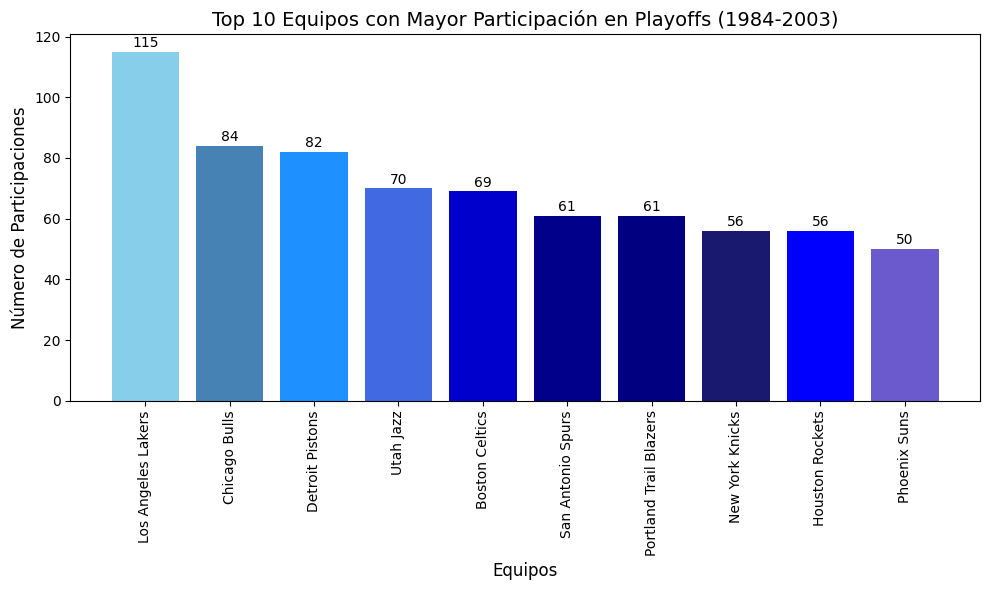

In [41]:
team_counts = games_playoffs['team_name_home'].value_counts()

top_10_teams = team_counts.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_teams.index, top_10_teams.values, color=['skyblue', 'steelblue', 'dodgerblue', 'royalblue', 'mediumblue', 'darkblue', 'navy', 'midnightblue', 'blue', 'slateblue'])
plt.xlabel("Equipos", fontsize=12)
plt.ylabel("Número de Participaciones", fontsize=12)
plt.title("Top 10 Equipos con Mayor Participación en Playoffs (1984-2003)", fontsize=14)
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Contar el número de jugadores únicos por equipo

# Mostrar el resultado

# Gráfica del número de jugadores por equipo



team_name_home
Atlanta Hawks             17
Boston Celtics            16
Charlotte Hornets         24
Chicago Bulls             16
Cleveland Cavaliers       17
Dallas Mavericks          14
Denver Nuggets            21
Detroit Pistons           17
Golden State Warriors     21
Houston Rockets           14
Indiana Pacers            15
Los Angeles Clippers      18
Los Angeles Lakers        23
Memphis Grizzlies         23
Miami Heat                14
Milwaukee Bucks           16
Minnesota Timberwolves    16
New Jersey Nets           16
New Orleans Hornets       13
New York Knicks           15
Orlando Magic             16
Philadelphia 76ers        19
Phoenix Suns              19
Portland Trail Blazers    19
Sacramento Kings          17
San Antonio Spurs         17
Seattle SuperSonics       13
Toronto Raptors           15
Utah Jazz                 16
Washington Bullets        21
Name: person_id, dtype: int64


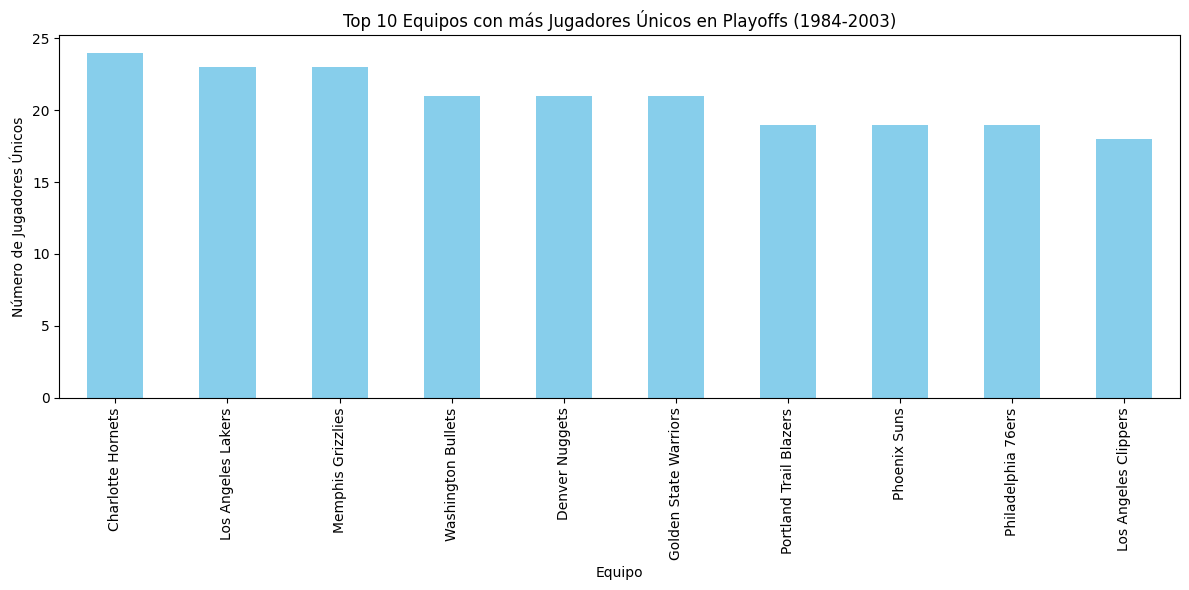

In [17]:
players_per_team = player_game_stats.groupby('team_name_home')['person_id'].nunique()

print(players_per_team)

plt.figure(figsize=(12, 6))
players_per_team.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Equipo')
plt.ylabel('Número de Jugadores Únicos')
plt.title('Top 10 Equipos con más Jugadores Únicos en Playoffs (1984-2003)')
plt.tight_layout()
plt.show()

3. Equipos que Han Anotado Más Puntos en los Playoffs
Vamos a calcular qué equipos han acumulado más puntos como locales a lo largo de los Playoffs.

In [ ]:
# Agrupar por equipo y sumar los puntos anotados como locales

# Mostrar los equipos que más puntos han anotado



In [20]:
team_points = games_playoffs.groupby('team_name_home')['pts_home'].sum()

team_points_sorted = team_points.sort_values(ascending=False)

print(team_points_sorted)

team_name_home
Los Angeles Lakers        12554.0
Chicago Bulls              8392.0
Detroit Pistons            8127.0
Boston Celtics             7702.0
Utah Jazz                  7025.0
Portland Trail Blazers     6496.0
San Antonio Spurs          5965.0
Houston Rockets            5806.0
Phoenix Suns               5435.0
New York Knicks            5364.0
Philadelphia 76ers         4697.0
Milwaukee Bucks            4546.0
Seattle SuperSonics        4507.0
Indiana Pacers             4207.0
Dallas Mavericks           3787.0
Atlanta Hawks              3379.0
Denver Nuggets             2880.0
Cleveland Cavaliers        2727.0
Miami Heat                 2195.0
New Jersey Nets            2086.0
Orlando Magic              2026.0
Sacramento Kings           1952.0
Minnesota Timberwolves     1885.0
Charlotte Hornets          1462.0
Golden State Warriors      1430.0
Washington Bullets          829.0
New Orleans Hornets         551.0
Los Angeles Clippers        497.0
Toronto Raptors             471.0

* haga un grafico de barras en azul con estos resultados

In [ ]:
# Gráfica de los equipos con más puntos anotados


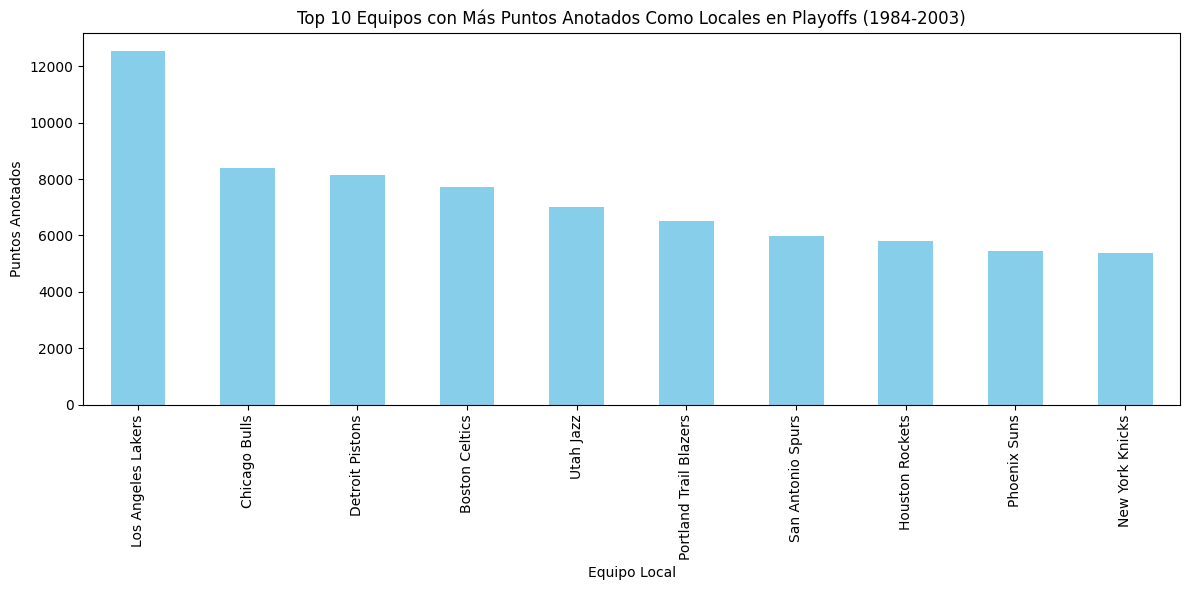

In [21]:
plt.figure(figsize=(12, 6))
team_points_sorted.head(10).plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Equipo Local')
plt.ylabel('Puntos Anotados')
plt.title('Top 10 Equipos con Más Puntos Anotados Como Locales en Playoffs (1984-2003)')
plt.tight_layout()
plt.show()

4. Equipos con Mejor Promedio de Puntos por Partido (en Casa)
Aquí calculamos el promedio de puntos por partido de cada equipo como local.

In [ ]:
# Calcular el promedio de puntos por equipo en casa

# Mostrar los equipos con mejor promedio de puntos en casa


In [24]:
team_avg_points = games_playoffs.groupby('team_name_home')['pts_home'].mean()

team_avg_points_sorted = team_avg_points.sort_values(ascending=False)
print(team_avg_points_sorted)

team_name_home
Denver Nuggets            115.200000
Boston Celtics            111.623188
Golden State Warriors     110.000000
Los Angeles Lakers        109.165217
Phoenix Suns              108.700000
Dallas Mavericks          108.200000
Portland Trail Blazers    106.491803
Milwaukee Bucks           105.720930
Seattle SuperSonics       104.813953
Houston Rockets           103.678571
Washington Bullets        103.625000
Sacramento Kings          102.736842
Philadelphia 76ers        102.108696
Orlando Magic             101.300000
Cleveland Cavaliers       101.000000
Utah Jazz                 100.357143
Chicago Bulls              99.904762
Los Angeles Clippers       99.400000
Atlanta Hawks              99.382353
Detroit Pistons            99.109756
San Antonio Spurs          97.786885
Charlotte Hornets          97.466667
New York Knicks            95.785714
Indiana Pacers             95.613636
Memphis Grizzlies          95.000000
New Jersey Nets            94.818182
Minnesota Timberwolves 

Hga un grafico en naranja de estos resultados

In [ ]:
# Gráfica del promedio de puntos en casa por equipo


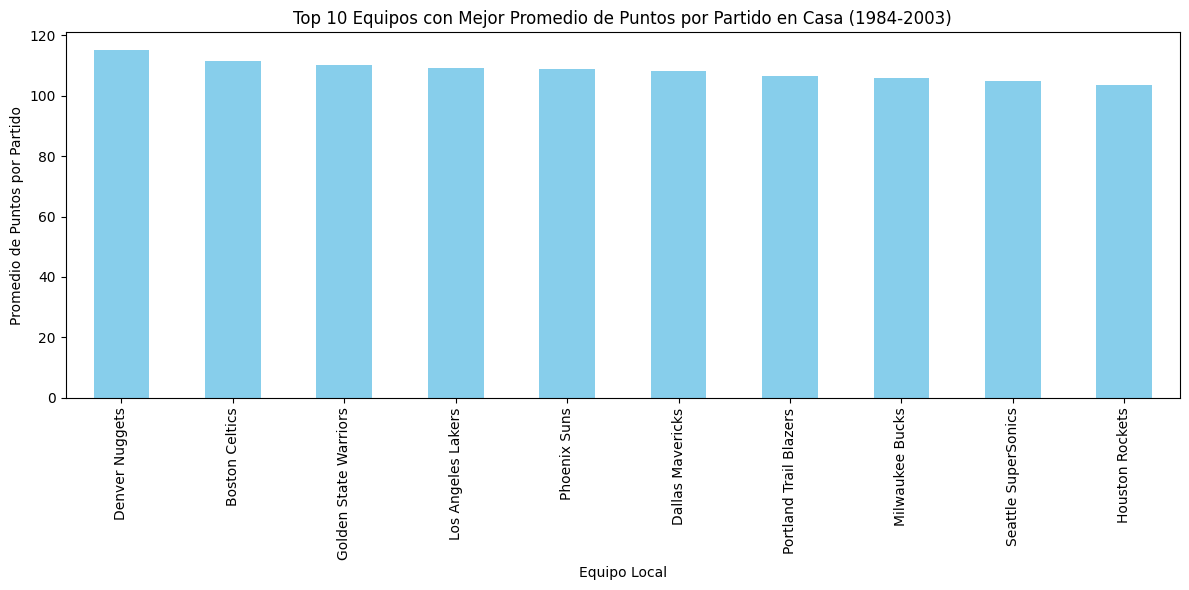

In [25]:
plt.figure(figsize=(12, 6))
team_avg_points_sorted.head(10).plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Equipo Local')
plt.ylabel('Promedio de Puntos por Partido')
plt.title('Top 10 Equipos con Mejor Promedio de Puntos por Partido en Casa (1984-2003)')
plt.tight_layout()
plt.show()

5. Temporadas con Mayor Cantidad de Puntos Anotados en los Playoffs
Vamos a identificar qué temporadas han tenido el mayor número de puntos totales anotados en los Playoffs. Cree una columna total_points con la suma de pts_home y pts_away, puede usar session_id

In [ ]:
# Agrupar por temporada y sumar los puntos anotados

# Mostrar las temporadas con más puntos


In [28]:
games_playoffs['total_points'] = games_playoffs['pts_home'] + games_playoffs['pts_away']
season_total_points = games_playoffs.groupby('season_id')['total_points'].sum()
season_total_points

<ipython-input-28-5642c4de90e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_playoffs['total_points'] = games_playoffs['pts_home'] + games_playoffs['pts_away']


,total_points
season_id,
41984,15598.0
41985,15057.0
41986,15678.0
41987,16691.0
41988,13003.0
41989,15195.0
41990,14165.0
41991,15075.0
41992,15127.0


* Cree una serie de tiempo con esto:

In [ ]:
# Gráfica de las temporadas con más puntos


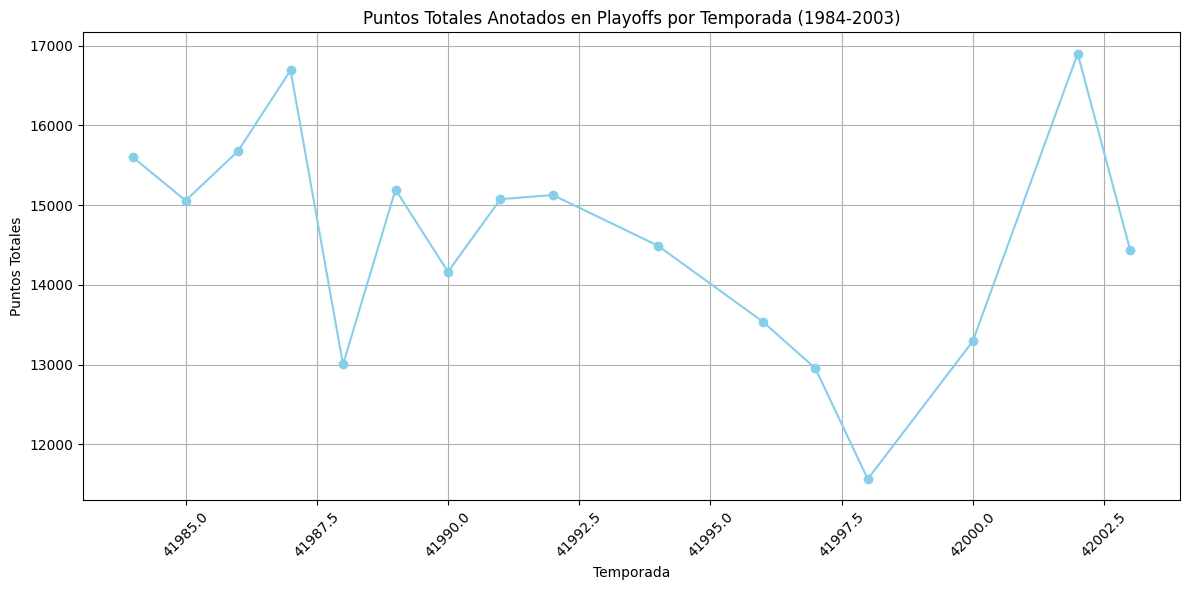

In [30]:
plt.figure(figsize=(12, 6))
season_total_points.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Temporada')
plt.ylabel('Puntos Totales')
plt.title('Puntos Totales Anotados en Playoffs por Temporada (1984-2003)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

* Hay algun dato interesante en esta grafica: Hay un dato que es el mas bajo de todos, en la temporada 1998-99, donde los puntos fueron menos que 12000. Un punto bajo en el rendimiento del equipo que que fue decayendo desde 1990.

# SECCION 3

1. Pivot Table: Comparación del Rendimiento por Posición y Equipo
Primero, crearemos una pivot table para comparar el rendimiento promedio de los jugadores en diferentes posiciones dentro de cada equipo, en términos de puntos anotados, rebotes, y asistencias.
 Variables de puntajes: ['pts_home', 'reb_home', 'ast_home'],
Variables utiles: ['team_name_home', 'position_y']


In [ ]:
# Crear pivot table para comparar el rendimiento promedio por posición y equipo

# Mostrar el resultado de la pivot table


In [32]:
pivot_table = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'], index=['team_name_home', 'position_y'], aggfunc='mean')
pivot_table

ast_home    pts_home   reb_home
team_name_home     position_y                                  
Atlanta Hawks      C           22.882353   99.382353  41.617647
                   PF          22.882353   99.382353  41.617647
                   PF-SF       22.882353   99.382353  41.617647
                   PG          22.882353   99.382353  41.617647
                   SF          22.882353   99.382353  41.617647
...                                  ...         ...        ...
Washington Bullets PG          18.000000  103.625000  35.500000
                   PG-SG       18.000000  103.625000  35.500000
                   SF          18.000000  103.625000  35.500000
                   SF-SG       18.000000  103.625000  35.500000
                   SG          18.000000  103.625000  35.500000

[241 rows x 3 columns]

* Agrupe las posiciones (le pude ser util lo siguiente:

```
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})
```



In [ ]:
# Crear una columna que agrupe las posiciones en roles más generales


# Crear pivot table agrupando por los roles

# Graficar por roles agrupados


In [34]:
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})

In [35]:
pivot_table_roles = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'], index=['team_name_home', 'role'], aggfunc='mean')
pivot_table_roles

ast_home    pts_home   reb_home
team_name_home     role                                    
Atlanta Hawks      Ala     22.882353   99.382353  41.617647
                   Base    22.882353   99.382353  41.617647
                   Pivote  22.882353   99.382353  41.617647
Boston Celtics     Ala     26.811594  111.623188  43.652174
                   Base    26.811594  111.623188  43.652174
...                              ...         ...        ...
Utah Jazz          Base    23.042857  100.357143  43.371429
                   Pivote  23.042857  100.357143  43.371429
Washington Bullets Ala     18.000000  103.625000  35.500000
                   Base    18.000000  103.625000  35.500000
                   Pivote  18.000000  103.625000  35.500000

[88 rows x 3 columns]

# Crear una crosstab para analizar victorias por posición de los jugadores
utilice position_y y wl_home

In [ ]:
# Crear una crosstab para analizar victorias por posición de los jugadores

# Mostrar el resultado de la crosstab


In [43]:
crosstab_wins_position = pd.crosstab(player_game_stats['position_y'], player_game_stats['wl_home'])
print(crosstab_wins_position)

wl_home        L     W
position_y            
C            546  1055
C-PF         170   271
PF          1192  2321
PF-C         341   699
PF-SF        136   270
PG          1160  2362
PG-SG        243   554
SF           860  1600
SF-PF        256   459
SF-SG        152   270
SG          1355  2545
SG-PG        160   333
SG-SF        306   617


In [ ]:
# Gráfica para visualizar la pivot table


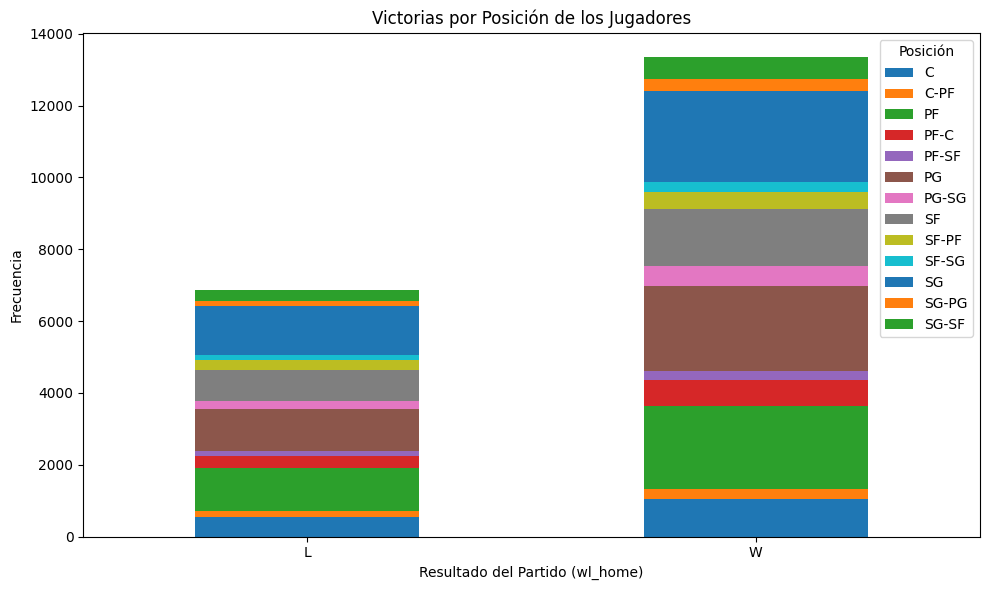

In [44]:
pivot_table_wins_position = crosstab_wins_position.T
pivot_table_wins_position.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Resultado del Partido (wl_home)')
plt.ylabel('Frecuencia')
plt.title('Victorias por Posición de los Jugadores')
plt.xticks(rotation=0)
plt.legend(title='Posición')
plt.tight_layout()
plt.show()

Sección 4: Análisis de Series de Tiempo y Identificación del Mejor Equipo

Vamos a usar series de tiempo para observar cómo los equipos han evolucionado en términos de puntos anotados, victorias, y otros indicadores a lo largo del tiempo.
1. Evolución de los Puntos Anotados por Temporada (Serie de Tiempo)session_id y pts_home
Este análisis mostrará cómo ha cambiado el promedio de puntos anotados en los Playoffs a lo largo de las temporadas.

In [ ]:
# Agrupar por temporada y calcular el promedio de puntos en casa

# Graficar la evolución del promedio de puntos por temporada


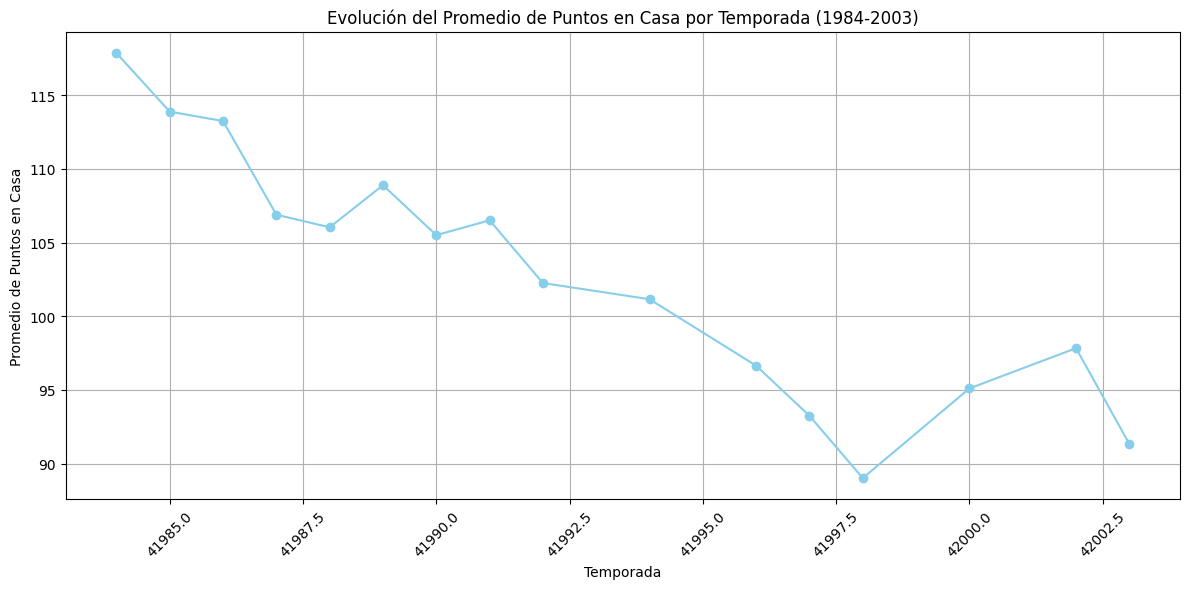

In [46]:
season_avg_points_home = games_playoffs.groupby('season_id')['pts_home'].mean()

plt.figure(figsize=(12, 6))
season_avg_points_home.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.title('Evolución del Promedio de Puntos en Casa por Temporada (1984-2003)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

2. Evolución del Rendimiento del Mejor Equipo a lo Largo del Tiempo
Primero, identificamos el equipo que ha anotado más puntos en total y luego analizamos cómo ha evolucionado su rendimiento en los Playoffs.

In [ ]:
# Identificar el equipo con más puntos anotados en total

# Filtrar los datos para ese equipo y agrupar por temporada

# Graficar la evolución del rendimiento del equipo


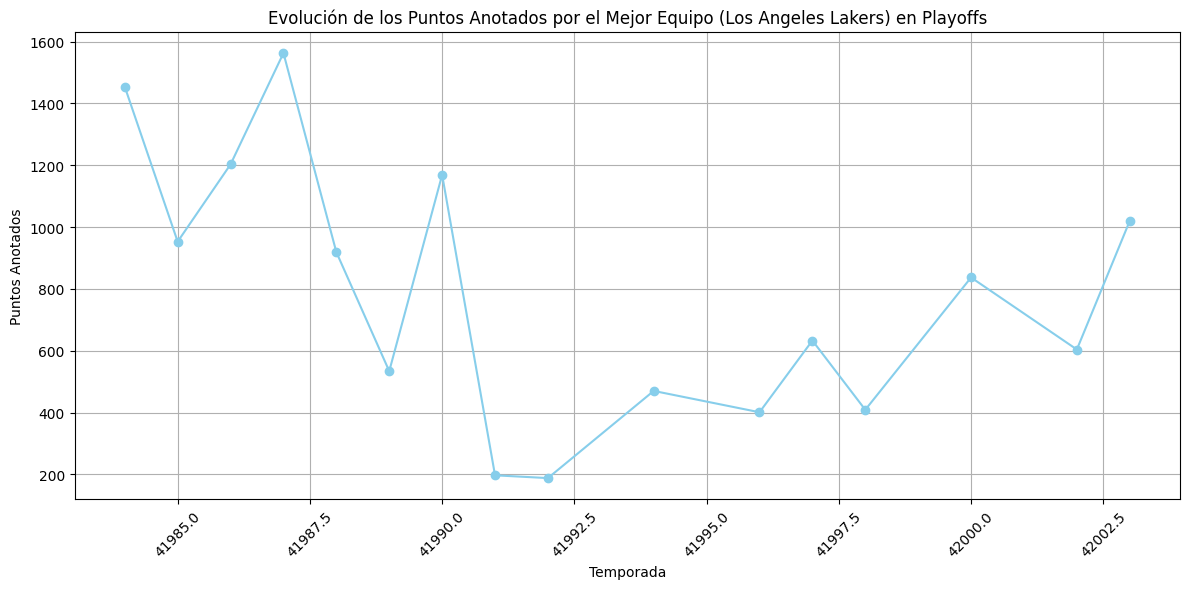

In [48]:
team_total_points = games_playoffs.groupby('team_name_home')['pts_home'].sum()
best_team = team_total_points.idxmax()

best_team_performance = games_playoffs[games_playoffs['team_name_home'] == best_team].groupby('season_id')['pts_home'].sum()

plt.figure(figsize=(12, 6))
best_team_performance.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Temporada')
plt.ylabel('Puntos Anotados')
plt.title(f'Evolución de los Puntos Anotados por el Mejor Equipo ({best_team}) en Playoffs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Sección 5: Identificación del Mejor Jugador y Análisis Específico
Ahora vamos a centrarnos en identificar al mejor jugador y analizar su rendimiento a lo largo de las temporadas.

3. Identificación del Jugador con Más Puntos Anotados
Primero identificamos al jugador que ha anotado más puntos en los Playoffs y luego analizamos su evolución.

In [ ]:
# Agrupar por jugador y sumar los puntos anotados

# Mostrar el jugador con más puntos anotados en los Playoffs


In [50]:
player_total_points = player_game_stats.groupby('player_name')['pts_home'].sum()

top_scorer = player_total_points.idxmax()
max_points = player_total_points.max()

print(f"El jugador con más puntos anotados en los Playoffs es: {top_scorer} con {max_points} puntos.")

El jugador con más puntos anotados en los Playoffs es: Rawle Alkins con 16784.0 puntos.


4. Evolución del Rendimiento del Mejor Jugador
Analizamos cómo ha cambiado el rendimiento del jugador con más puntos anotados a lo largo de los años.

In [ ]:
# Filtrar los datos para ese jugador y agrupar por temporada

# Graficar la evolución del rendimiento del jugador



season_id
41984     412.0
41985     208.0
41986     188.0
41987     946.0
41988    1618.0
41989    1716.0
41990    1858.0
41991    2466.0
41992    2120.0
41994     994.0
41996    2078.0
41997    2180.0
Name: pts_home, dtype: float64


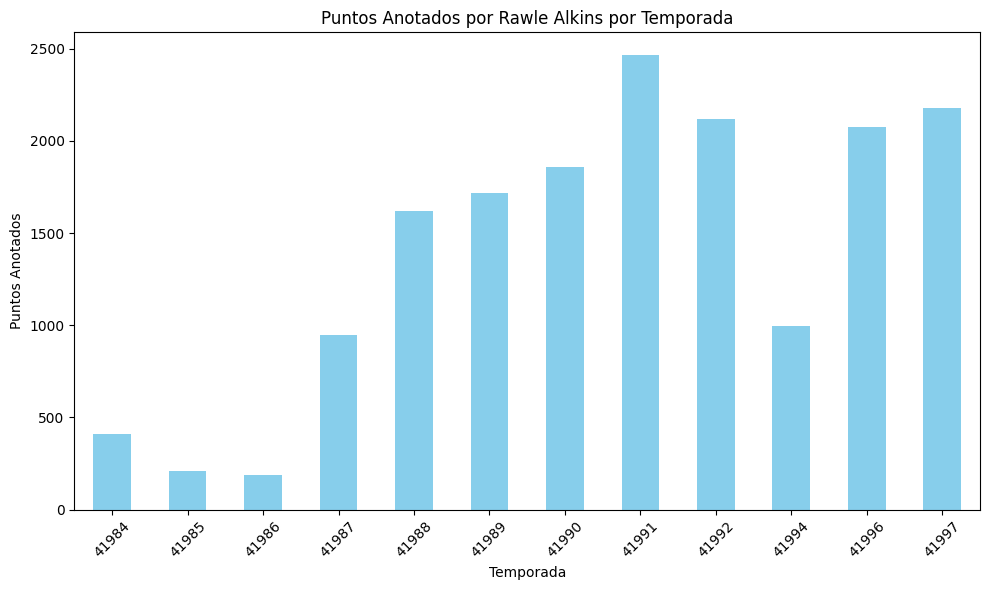

In [53]:
rawle_alkins_stats = player_game_stats[player_game_stats['player_name'] == 'Rawle Alkins']

rawle_alkins_season_stats = rawle_alkins_stats.groupby('season_id')['pts_home'].sum()

print(rawle_alkins_season_stats)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
rawle_alkins_season_stats.plot(kind='bar', color='skyblue')
plt.xlabel('Temporada')
plt.ylabel('Puntos Anotados')
plt.title('Puntos Anotados por Rawle Alkins por Temporada')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Comparación entre Jugadores (Puntos por Partido)
Realizamos una comparación entre los jugadores para ver quiénes han sido los más efectivos en términos de puntos anotados por partido.

In [ ]:
# Agrupar por jugador y calcular el promedio de puntos por partido

# Graficar los 10 jugadores con mejor promedio de puntos por partido


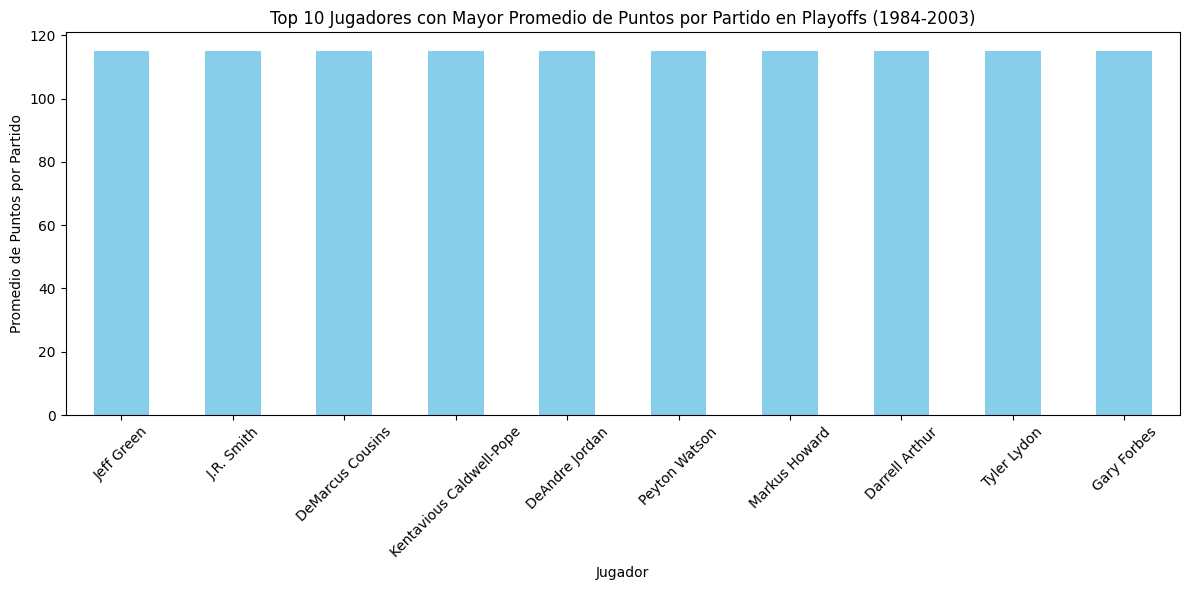

In [55]:
player_avg_points = player_game_stats.groupby('player_name')['pts_home'].mean()

top_10_players = player_avg_points.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_players.plot(kind='bar', color='skyblue')
plt.xlabel('Jugador')
plt.ylabel('Promedio de Puntos por Partido')
plt.title('Top 10 Jugadores con Mayor Promedio de Puntos por Partido en Playoffs (1984-2003)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Desempeño de un Jugador Específico
Podemos enfocarnos en un jugador en particular (puedes reemplazar el ID por el jugador que te mas puntos tenga) para analizar su rendimiento a lo largo del tiempo.
* Filtre person_id con el id específico
* Agrupe puntos por id de temporada.
* Analice el rendimiento del Jugador
* Busque en la base de datos la columna la columna first_name_x	last_name_x el person_id que le dio

In [ ]:
# Especificar el ID del jugador que queremos analizar (puedes cambiar el ID)

# Filtrar los datos para ese jugador y agrupar por temporada

# Graficar el rendimiento de ese jugador a lo largo de las temporadas



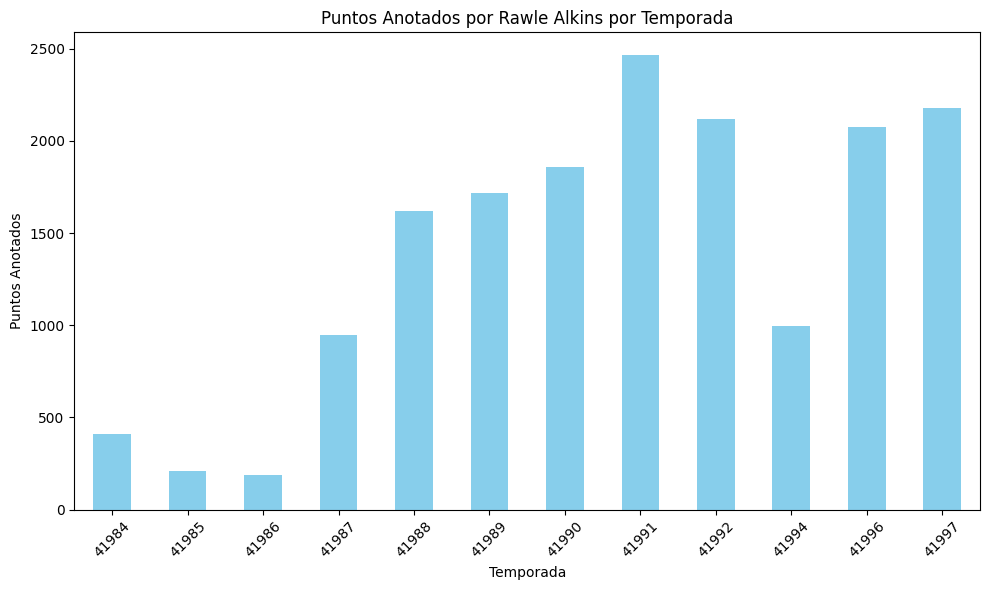

El jugador con más puntos anotados es: Rawle Alkins con ID: 1628959


In [57]:
player_total_points = player_game_stats.groupby('person_id')['pts_home'].sum()
top_scorer_id = player_total_points.idxmax()

top_scorer_stats = player_game_stats[player_game_stats['person_id'] == top_scorer_id]

top_scorer_season_stats = top_scorer_stats.groupby('season_id')['pts_home'].sum()

player_name = players_df[players_df['person_id'] == top_scorer_id][['first_name', 'last_name']].values[0]
player_full_name = f"{player_name[0]} {player_name[1]}"

plt.figure(figsize=(10, 6))
top_scorer_season_stats.plot(kind='bar', color='skyblue')
plt.xlabel('Temporada')
plt.ylabel('Puntos Anotados')
plt.title(f'Puntos Anotados por {player_full_name} por Temporada')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"El jugador con más puntos anotados es: {player_full_name} con ID: {top_scorer_id}")

8. Relación entre el Tiempo de Experiencia
`"season_exp"` y los Puntos Anotados `pts_home` Finalmente, analizamos si hay una relación entre el tiempo de experiencia de un jugador y su rendimiento en los Playoffs.
* Haga un groupby
* Haga una Grafica de serie de tiempo
* Analice: ¿Los jugadores con más años de experiencia tienden a anotar más puntos en los Playoffs?

In [ ]:
# Agrupar por años de experiencia y calcular el promedio de puntos anotados

# Graficar la relación entre la experiencia y los puntos anotados



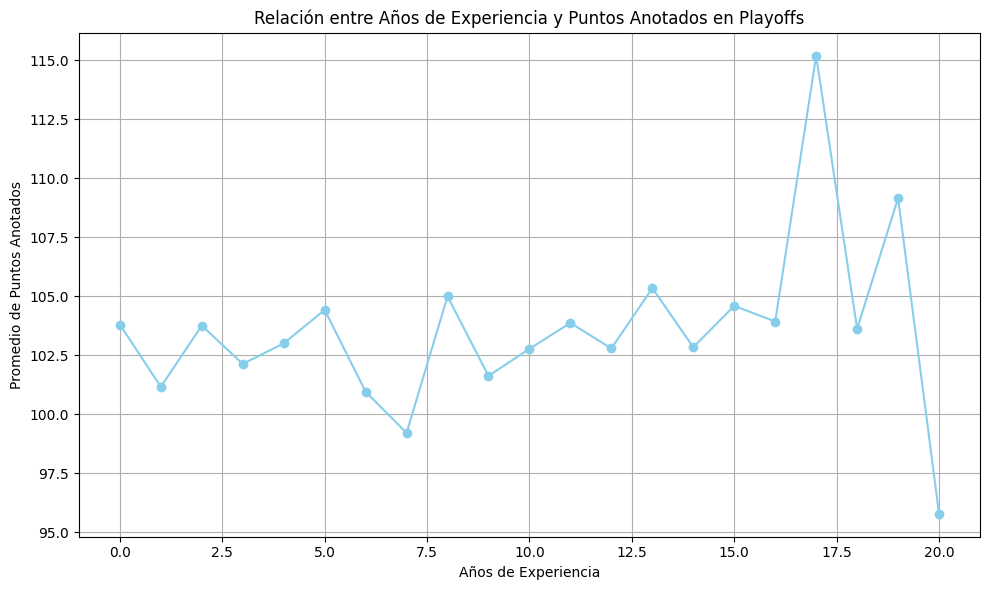

La correlación entre años de experiencia y puntos anotados es: 0.03041041978890167


In [59]:
experience_points = player_game_stats.groupby('season_exp')['pts_home'].mean()

plt.figure(figsize=(10, 6))
experience_points.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Años de Experiencia')
plt.ylabel('Promedio de Puntos Anotados')
plt.title('Relación entre Años de Experiencia y Puntos Anotados en Playoffs')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = player_game_stats['season_exp'].corr(player_game_stats['pts_home'])
print(f"La correlación entre años de experiencia y puntos anotados es: {correlation}")

Analice: ¿Los jugadores con más años de experiencia tienden a anotar más puntos en los Playoffs?

Lo que la correlación muestra es que entre años de experiencia y puntos anotados, la dependendia es débil o casi inexistente, pues el puntaje es muy bajo.

* Juagador es:

## SECCION 7 : Preguntas de Negocio

1. ¿Qué factores crees que han influido en la evolución del rendimiento del mejor equipo a lo largo de los años?

**Evolución táctica:** Las estrategias y tácticas del juego están en constante cambio. La introducción de nuevas jugadas, sistemas defensivos y ofensivos más eficaces, así como la adaptación a las fortalezas y debilidades de los oponentes, son esenciales para el éxito a largo plazo. Sin embargo, no hay datos disponibles para un análisis exhaustivo de estas tácticas.

**Calidad de los jugadores:** La llegada de nuevos talentos, la mejora de los jugadores existentes y la creación de un equipo cohesionado son cruciales. El análisis resalta la importancia de contar con jugadores más experimentados y con mejores promedios de puntos por partido, aunque se requieren datos más específicos sobre habilidades individuales para obtener conclusiones más precisas. Aunque la experiencia parece estar relacionada positivamente con el rendimiento, no es un factor determinante.

**Consistencia del equipo:** Mantener un nivel de rendimiento estable a lo largo de la temporada y en diferentes partidos es fundamental para la evolución del equipo, un aspecto que no queda claramente reflejado en el análisis actual.

2. Al observar el rendimiento del mejor jugador a lo largo del tiempo, ¿qué puedes inferir sobre su consistencia y su impacto en los Playoffs? ¿Qué harías como entrenador para mantener o mejorar su rendimiento?

El impacto en los playoffs puede deducirse de la puntuación total y el promedio de puntos por partido en comparación con otros jugadores. Un alto puntaje y un buen promedio indican un impacto notable.

**Acciones del entrenador para mantener o mejorar su rendimiento:**

1. **Análisis detallado del rendimiento:** Además de los puntos, es importante evaluar estadísticas como rebotes, asistencias, porcentaje de tiros, robos y pérdidas, y analizar el rendimiento en diversas situaciones de juego.

2. **Desarrollo de estrategias personalizadas:** Crear jugadas que maximicen sus fortalezas. Si hay inconsistencias en su desempeño, identificar las causas (como cansancio o presión) y ajustar las estrategias en consecuencia.

3. **Entrenamiento físico y mental:** Implementar un programa de entrenamiento físico que garantice su óptima condición física, así como incorporar técnicas para manejar el estrés y la presión, mejorando así su rendimiento mental en momentos críticos.

4. **Trabajo en equipo:** Promover la cohesión del equipo y el trabajo conjunto para que el jugador destacado cuente con el apoyo de sus compañeros y no asuma toda la responsabilidad.

5. **Evaluación y adaptación:** Revisar periódicamente el rendimiento del jugador y ajustar las estrategias, el plan de entrenamiento y su rol en el equipo según sea necesario.

6. **Análisis de rivales:** Investigar las debilidades de los oponentes para diseñar jugadas que permitan aprovecharlas y otorgar ventaja al jugador más destacado.

3. ¿Qué papel crees que juegan las posiciones de los jugadores en el éxito de un equipo en los Playoffs? ¿Hay alguna posición que consideres clave para aumentar las probabilidades de victoria?

A partir del análisis de los datos disponibles, se puede destacar la relevancia de cada rol en el desempeño del equipo:

* **Bases:** Su función es fundamental en la creación de juego y el manejo del balón. Los bases muestran un rendimiento notable en puntos, y su habilidad para distribuir el balón y generar oportunidades de tiro es clave para el éxito ofensivo.

* **Alas:** Gracias a su versatilidad, las alas desempeñan un papel importante en el éxito del equipo. Su capacidad para anotar, rebotar y asistir, así como su habilidad para defender y marcar puntos en momentos críticos, puede ser decisiva.

* **Pívots:** Aunque suelen centrarse en el rebote y la defensa, su contribución en puntos puede ser menor en este conjunto de datos. Sin embargo, su dominio en el rebote les permite asegurar segundas oportunidades y frenar el ataque rival.

No hay una única posición que garantice la victoria; el éxito en playoffs depende de la cohesión y el rendimiento colectivo del equipo. Si bien los bases son cruciales en la generación de puntos y las alas destacan por su versatilidad, el desempeño de los pívots en la defensa y el rebote es igualmente esencial.
